# Image classification using deep clustering
The purpose of the project is to use unsupervised image classification techniques on the German traffic sign dataset. A comparison between different state-of-the-art models is required regarding the accuracy, A theoretical comparison justifying the choice of the model is also acceptable.

## Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
%matplotlib inline

import time
import os, os.path
from os import listdir
import random
import cv2
import glob
import keras
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Train

In [4]:
images = np.load("/kaggle/input/german-signs/train_images.npy")
labels = np.load("/kaggle/input/german-signs/train_labels.npy")

In [5]:
def show_random_images(images, labels, number_of_images_to_show=2):

    for code in list(set(labels)):

        indicies = [i for i, label in enumerate(labels) if label == code]
        random_indicies = [random.choice(indicies) for i in range(number_of_images_to_show)]
        figure, axis = plt.subplots(1, number_of_images_to_show)

        print("{} random images for code {}".format(number_of_images_to_show, code))

        for image in range(number_of_images_to_show):
            axis[image].imshow(images[random_indicies[image]])
        plt.show()

10 random images for code 5


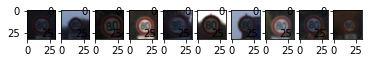

10 random images for code 13


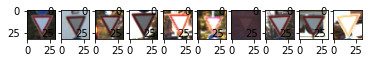

10 random images for code 17


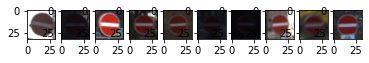

10 random images for code 0


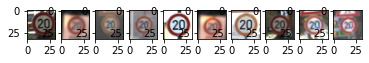

10 random images for code 12


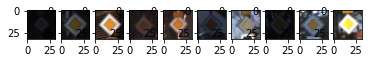

10 random images for code 11


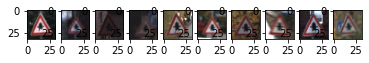

10 random images for code 15


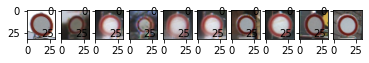

10 random images for code 36


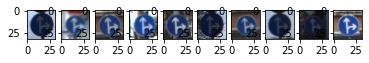

10 random images for code 10


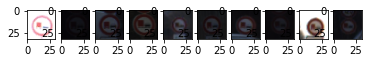

10 random images for code 31


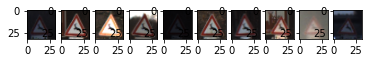

10 random images for code 1


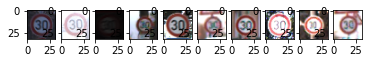

10 random images for code 26


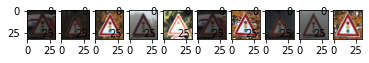

10 random images for code 6


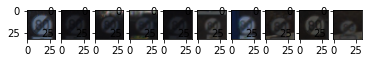

10 random images for code 27


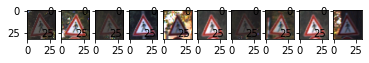

10 random images for code 24


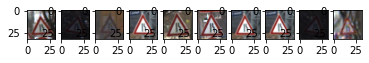

10 random images for code 21


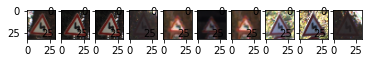

10 random images for code 2


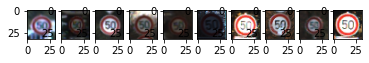

10 random images for code 28


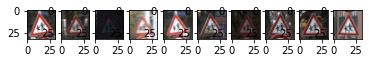

10 random images for code 35


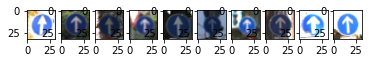

10 random images for code 40


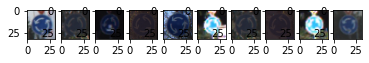

10 random images for code 19


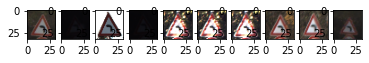

10 random images for code 37


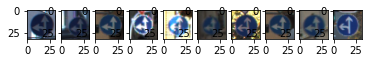

10 random images for code 16


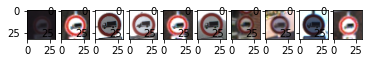

10 random images for code 22


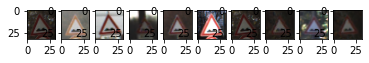

10 random images for code 39


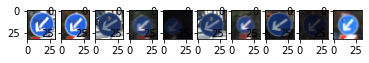

10 random images for code 7


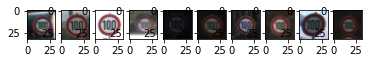

10 random images for code 20


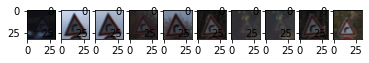

10 random images for code 33


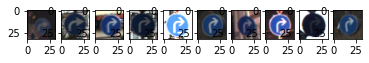

10 random images for code 14


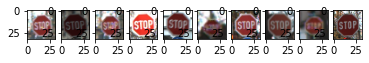

10 random images for code 42


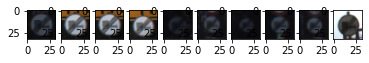

10 random images for code 41


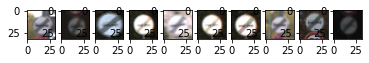

10 random images for code 25


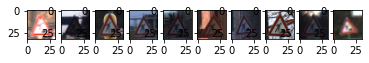

10 random images for code 32


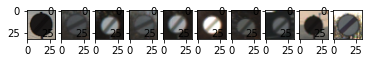

10 random images for code 23


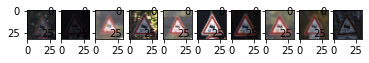

10 random images for code 3


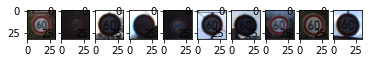

10 random images for code 8


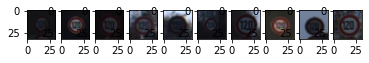

10 random images for code 38


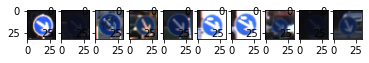

10 random images for code 18


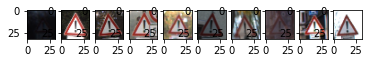

10 random images for code 30


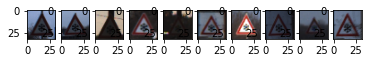

10 random images for code 9


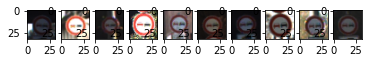

10 random images for code 34


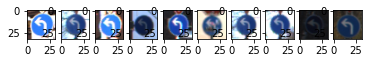

10 random images for code 4


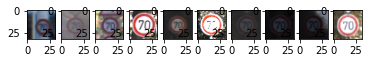

10 random images for code 29


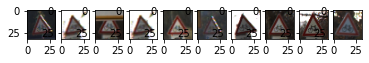

In [21]:
show_random_images(images, labels, number_of_images_to_show=10)

We then normaise the images before passing them on to VGG16, VGG19 or ResNet50.

In [5]:
def normalise_images(images, labels):
    # Normalise the images
    images /= 255
    
    return images, labels

In [6]:
images, labels = normalise_images(images, labels)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images[:10000], labels[:10000], test_size=0.2, random_state=728)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 32, 32, 3) (2000, 32, 32, 3) (8000,) (2000,)


Now that we have all the photos and their labels in arrays. It's time to split them to two different sets : training, validation and we already have testing.

We'll be using the train_test_split function from sklearn which will also shuffle the data around for us, since it's currently in order.


In [25]:
test_images = np.load("/kaggle/input/german-signs/test_images.npy")

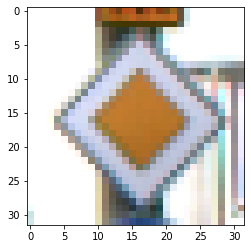

In [27]:
plt.imshow(test_images[50])

## Supervized

In [11]:
nb_class = 43

In [16]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### Arbiratory CNN

In [9]:
from tensorflow.keras import models, layers

In [17]:
model = models.Sequential() #Sequential Model

#ConvLayer(64 filters) + MaxPooling + BatchNormalization + Dropout
model.add(layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

#Flatten
model.add(layers.Flatten())

#Dense layer with 1000 hidden units
model.add(layers.Dense(1000,activation='relu'))

#Softmax layer for output
model.add(layers.Dense(nb_class,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              8193000   
_________________________________________________________________
dense_4 (Dense)              (None, 43)               

In [18]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history= model.fit(X_train, y_train_cat, epochs=20, batch_size=64,
                 validation_data=(X_test, y_test_cat))

Epoch 1/20


2022-12-05 19:42:40.641024: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


491/491 [==============================] - 11s 6ms/step - loss: 1.1092 - accuracy: 0.6943 - val_loss: 1.5970 - val_accuracy: 0.5556
Epoch 2/20
491/491 [==============================] - 3s 5ms/step - loss: 0.2337 - accuracy: 0.9399 - val_loss: 5.1922 - val_accuracy: 0.4436
Epoch 3/20
491/491 [==============================] - 2s 5ms/step - loss: 0.1282 - accuracy: 0.9649 - val_loss: 0.1403 - val_accuracy: 0.9625
Epoch 4/20
491/491 [==============================] - 3s 5ms/step - loss: 0.0858 - accuracy: 0.9759 - val_loss: 0.1226 - val_accuracy: 0.9642
Epoch 5/20
491/491 [==============================] - 3s 5ms/step - loss: 0.0613 - accuracy: 0.9832 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 6/20
491/491 [==============================] - 3s 5ms/step - loss: 0.0537 - accuracy: 0.9845 - val_loss: 0.0703 - val_accuracy: 0.9814
Epoch 7/20
491/491 [==============================] - 2s 5ms/step - loss: 0.0420 - accuracy: 0.9881 - val_loss: 0.0968 - val_accuracy: 0.9725
Epoch 8/20
491/4

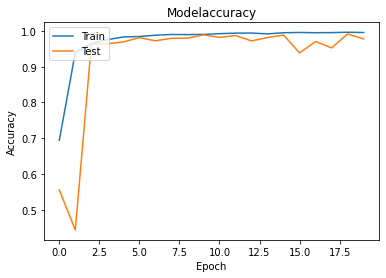

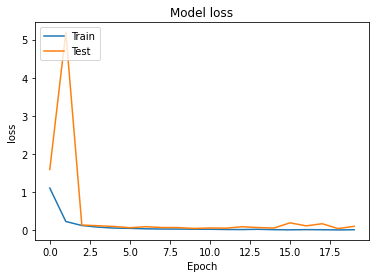

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Modelaccuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

## Unsupervized

### First try

#### Pretrained Models to encode

VGG16, VG19, ResNet50

We'll now load up the keras models with the imagenet weights. We'll remove the top dense layers, since we won't need to classify things here, and we just want these encoded features from the images.

In [24]:
# Load the models with ImageNet weights
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50

vgg16_model = VGG16(include_top=False, weights="imagenet", input_shape=(32,32,3))
vgg19_model = VGG19(include_top=False, weights="imagenet", input_shape=(32,32,3))
resnet50_model = ResNet50(include_top=False, weights="imagenet", input_shape=(32,32,3))

94781440/94765736 [==============================] - 1s 0us/step


The covnet models will give us 3D vectors that represent the image. We need to flatten these for the clustering algorithms to start working with them.

In [25]:
def covnet_transform(covnet_model, raw_images):
    # Pass our training data through the network
    pred = covnet_model.predict(raw_images)

    # Flatten the array
    flat = pred.reshape(raw_images.shape[0], -1)
    
    return flat

In [26]:
vgg16_output = covnet_transform(vgg16_model, X_train)
print("VGG16 flattened output has {} features".format(vgg16_output.shape[1]))

vgg19_output = covnet_transform(vgg19_model, X_train)
print("VGG19 flattened output has {} features".format(vgg19_output.shape[1]))

resnet50_output = covnet_transform(resnet50_model, X_train)
print("ResNet50 flattened output has {} features".format(resnet50_output.shape[1]))

VGG16 flattened output has 512 features
VGG19 flattened output has 512 features
ResNet50 flattened output has 2048 features


The above cell shows us the number of features each covnet gives to a single image. When we compare these to the original size of the image 32 x 32 x 3 = 3072 pixels/features, we can see that this is a large reduction in what the clustering algorithms will have to work with.

Hopefully these reduces number of feature are represent more meaningful features in the image structure.

#### PCA

While k-means clustering has coped with these numbers, Gaussian Mixture Modelling has not and the computer consistently ran out of memory and struggled to produce results.

We therefore look to PCA for dimensionality reduction, so that our clustering algorithms can cope.

In [30]:
from sklearn.decomposition import PCA
# Function that creates a PCA instance, fits it to the data and returns the instance
def create_fit_PCA(data, n_components=None):
    p = PCA(n_components=n_components, random_state=728)
    p.fit(data)
    return p

In [31]:
# Create PCA instances for each covnet output
vgg16_pca = create_fit_PCA(vgg16_output)
vgg19_pca = create_fit_PCA(vgg19_output)
resnet50_pca = create_fit_PCA(resnet50_output)

In [32]:
# Function to plot the cumulative explained variance of PCA components
# This will help us decide how many components we should reduce our features to
def pca_cumsum_plot(pca):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

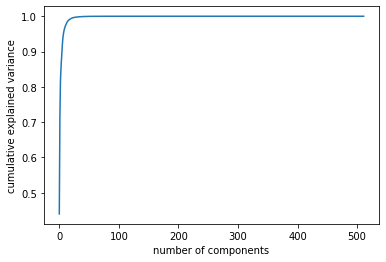

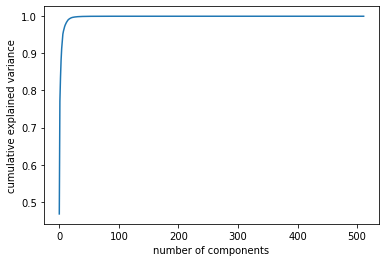

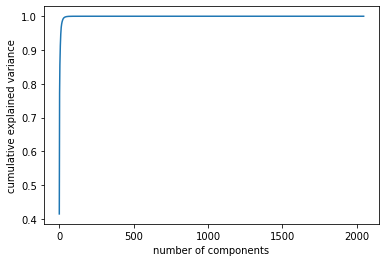

In [33]:
# Plot the cumulative explained variance for each covnet
pca_cumsum_plot(vgg16_pca)
pca_cumsum_plot(vgg19_pca)
pca_cumsum_plot(resnet50_pca)

Looking at the gaphs above, we can see that PCA can explain almost all the variance in as many dimensions as there are samples.

It is also interesting to note the difference in shape between the VGG graphs and the ResNet one. This is probably due to the fact that ResNet only had 2048 dimensions to start with, while VGGs had 25,088

In [34]:
# PCA transformations of covnet outputs
vgg16_output_pca = vgg16_pca.transform(vgg16_output)
vgg19_output_pca = vgg19_pca.transform(vgg19_output)
resnet50_output_pca = resnet50_pca.transform(resnet50_output)

#### Kmeans

Let's write a couple of functions that would create and fit KMeans.

In [35]:
def create_train_kmeans(data, number_of_clusters=43):
    # n_jobs is set to -1 to use all available CPU cores. This makes a big difference on an 8-core CPU
    # especially when the data size gets much bigger. #perfMatters
    
    k = KMeans(n_clusters=number_of_clusters, random_state=728)

    # Let's do some timings to see how long it takes to train.
    start = time.time()

    # Train it up
    k.fit(data)

    # Stop the timing 
    end = time.time()

    # And see how long that took
    print("Training took {} seconds".format(end-start))
    
    return k

In [36]:
# Let's pass the data into the algorithm and predict who lies in which cluster. 
# Since we're using the same data that we trained it on, this should give us the training results.

# Here we create and fit a KMeans model with the PCA outputs
print("KMeans (PCA): \n")

print("VGG16")
K_vgg16_pca = create_train_kmeans(vgg16_output_pca)

print("\nVGG19")
K_vgg19_pca = create_train_kmeans(vgg19_output_pca)

print("\nResNet50")
K_resnet50_pca = create_train_kmeans(resnet50_output_pca)

KMeans (PCA): 

VGG16
Training took 182.82956957817078 seconds

VGG19
Training took 108.3705050945282 seconds

ResNet50
Training took 885.5556704998016 seconds


In [37]:
# Let's also create models for the covnet outputs without PCA for comparison
print("KMeans: \n")

print("VGG16:")
K_vgg16 = create_train_kmeans(vgg16_output)

print("\nVGG19:")
K_vgg19 = create_train_kmeans(vgg19_output)

print("\nResNet50:")
K_resnet50 = create_train_kmeans(resnet50_output)

KMeans: 

VGG16:
Training took 95.48613357543945 seconds

VGG19:
Training took 83.96388053894043 seconds

ResNet50:
Training took 254.85358929634094 seconds


In [38]:
# Now we get the custer model predictions

# KMeans with PCA outputs
k_vgg16_pred_pca = K_vgg16_pca.predict(vgg16_output_pca)
k_vgg19_pred_pca = K_vgg19_pca.predict(vgg19_output_pca)
k_resnet50_pred_pca = K_resnet50_pca.predict(resnet50_output_pca)

# KMeans with CovNet outputs (without PCA)
k_vgg16_pred = K_vgg16.predict(vgg16_output)
k_vgg19_pred = K_vgg19.predict(vgg19_output)
k_resnet50_pred = K_resnet50.predict(resnet50_output)

The clustering algorith does not detect which images are which in term how labels, it only groups images that look alike together and assigns them a number arbitrarily.

We now need to count how many of each label are in each cluster, this way we can take a look and if sufficient eperation has happened we can quicly see which cluster is which label. So let's write a function that does that.


#### Trying to get the cluster names back

In [39]:
def cluster_label_count(clusters, labels):
    
    count = {}
    
    # Get unique clusters and labels
    unique_clusters = list(set(clusters))
    unique_labels = list(set(labels))
    
    # Create counter for each cluster/label combination and set it to 0
    for cluster in unique_clusters:
        count[cluster] = {}
        
        for label in unique_labels:
            count[cluster][label] = 0
    
    # Let's count
    for i in range(len(clusters)):
        count[clusters[i]][labels[i]] +=1
    
    cluster_df = pd.DataFrame(count)
    
    return cluster_df

In [40]:
# Cluster counting for VGG16 KMeans
vgg16_cluster_count = cluster_label_count(k_vgg16_pred, y_train)
vgg16_cluster_count_pca = cluster_label_count(k_vgg16_pred_pca, y_train)

# VGG19 KMeans
vgg19_cluster_count = cluster_label_count(k_vgg19_pred, y_train)
vgg19_cluster_count_pca = cluster_label_count(k_vgg19_pred_pca, y_train)

# ResNet50 KMeans
resnet_cluster_count = cluster_label_count(k_resnet50_pred, y_train)
resnet_cluster_count_pca = cluster_label_count(k_resnet50_pred_pca, y_train)

#### Accuracy

In [41]:
print("KMeans VGG16: ")
cm_argmax = vgg16_cluster_count.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg16_pred])
print(accuracy_score(y_train,pred_))

print("KMeans VGG16 (PCA): ")
cm_argmax = vgg16_cluster_count_pca.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg16_pred_pca])
print(accuracy_score(y_train,pred_))

############
print("\n KMeans VGG19: ")
cm_argmax = vgg19_cluster_count.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg19_pred])
print(accuracy_score(y_train,pred_))

print("KMeans VGG16: ")
cm_argmax = vgg19_cluster_count_pca.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_vgg19_pred_pca])
print(accuracy_score(y_train,pred_))

###########

print("\n KMeans Resnet50: ")
cm_argmax = resnet_cluster_count.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_resnet50_pred])
print(accuracy_score(y_train,pred_))

print("Kmeans Resnet50 (PCA): ")
cm_argmax = resnet_cluster_count_pca.idxmax(axis=0)
pred_ = np.array([cm_argmax[i] for i in k_resnet50_pred_pca])
print(accuracy_score(y_train,pred_))

KMeans VGG16: 
0.15069497577148686
KMeans VGG16 (PCA): 
0.15299030859474624

 KMeans VGG19: 
0.14527543993879113
KMeans VGG16: 
0.1483040040805917

 KMeans Resnet50: 
0.07593726090283091
Kmeans Resnet50 (PCA): 
0.16606095383830655


Pretty bad even on training Data. I'll search for different methods.

### Second Try : IIC on Minst Dataset

In [2]:
!pip install tensorflow_addons

#### Data

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa


def mnist_x(x_orig, mdl_input_dims, is_training):
    # rescale to [0, 1]
    x_orig = tf.cast(x_orig, dtype=tf.float32) / x_orig.dtype.max

    # get common shapes
    height_width = mdl_input_dims[:-1]
    n_chans = mdl_input_dims[-1]

    # training transformations
    if is_training:
        x1 = tf.image.central_crop(x_orig, np.mean(20 / np.array(x_orig.shape.as_list()[1:-1])))
        x2 = tf.image.random_crop(x_orig, tf.concat((tf.shape(x_orig)[:1], [20, 20], [n_chans]), axis=0))
        x = tf.stack([x1, x2])
        x = tf.transpose(x, [1, 0, 2, 3, 4])
        i = tf.squeeze(tf.random.categorical([[1., 1.]], tf.shape(x)[0]))
        x = tf.map_fn(lambda y: y[0][y[1]], (x, i), dtype=tf.float32)
        x = tf.image.resize(x, height_width)

    # testing transformations
    else:
        x = tf.image.central_crop(x_orig, np.mean(20 / np.array(x_orig.shape.as_list()[1:-1])))
        x = tf.image.resize(x, height_width)

    return x


def mnist_gx(x_orig, mdl_input_dims, is_training, sample_repeats):

    # if not training, return a constant value--it will unused but needs to be same shape to avoid TensorFlow errors
    if not is_training:
        return tf.zeros([0] + mdl_input_dims)

    # rescale to [0, 1]
    x_orig = tf.cast(x_orig, dtype=tf.float32) / x_orig.dtype.max

    # repeat samples accordingly
    x_orig = tf.tile(x_orig, [sample_repeats] + [1] * len(x_orig.shape.as_list()[1:]))

    # get common shapes
    height_width = mdl_input_dims[:-1]
    n_chans = mdl_input_dims[-1]

    # random rotation
    rad = 2 * np.pi * 25 / 360
    x_rot = tfa.image.rotate(x_orig, tf.random.uniform(shape=tf.shape(x_orig)[:1], minval=-rad, maxval=rad))
    gx = tf.stack([x_orig, x_rot])
    gx = tf.transpose(gx, [1, 0, 2, 3, 4])
    i = tf.squeeze(tf.random.categorical([[1., 1.]], tf.shape(gx)[0]))
    gx = tf.map_fn(lambda y: y[0][y[1]], (gx, i), dtype=tf.float32)

    # random crops
    x1 = tf.image.random_crop(gx, tf.concat((tf.shape(x_orig)[:1], [16, 16], [n_chans]), axis=0))
    x2 = tf.image.random_crop(gx, tf.concat((tf.shape(x_orig)[:1], [20, 20], [n_chans]), axis=0))
    x3 = tf.image.random_crop(gx, tf.concat((tf.shape(x_orig)[:1], [24, 24], [n_chans]), axis=0))
    gx = tf.stack([tf.image.resize(x1, height_width),
                   tf.image.resize(x2, height_width),
                   tf.image.resize(x3, height_width)])
    gx = tf.transpose(gx, [1, 0, 2, 3, 4])
    i = tf.squeeze(tf.random.categorical([[1., 1., 1.]], tf.shape(gx)[0]))
    gx = tf.map_fn(lambda y: y[0][y[1]], (gx, i), dtype=tf.float32)

    # apply random adjustments
    def rand_adjust(img):
        img = tf.image.random_brightness(img, 0.4)
        img = tf.image.random_contrast(img, 0.6, 1.4)
        if img.shape.as_list()[-1] == 3:
            img = tf.image.random_saturation(img, 0.6, 1.4)
            img = tf.image.random_hue(img, 0.125)
        return img

    gx = tf.map_fn(lambda y: rand_adjust(y), gx, dtype=tf.float32)

    return gx


def pre_process_data(ds, info, is_training, **kwargs):
    """
    :param ds: TensorFlow Dataset object
    :param info: TensorFlow DatasetInfo object
    :param is_training: indicator to pre-processing function
    :return: the passed in data set with map pre-processing applied
    """
    # apply pre-processing function for given data set and run-time conditions
    if info.name == 'mnist':
        return ds.map(lambda d: {'x': mnist_x(d['image'],
                                              mdl_input_dims=kwargs['mdl_input_dims'],
                                              is_training=is_training),
                                 'gx': mnist_gx(d['image'],
                                                mdl_input_dims=kwargs['mdl_input_dims'],
                                                is_training=is_training,
                                                sample_repeats=kwargs['num_repeats']),
                                 'label': d['label']},
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
    else:
        raise Exception('Unsupported data set: ' + info.name)


def configure_data_set(ds, info, batch_size, is_training, **kwargs):
    """
    :param ds: TensorFlow data set object
    :param info: TensorFlow DatasetInfo object
    :param batch_size: batch size
    :param is_training: indicator to pre-processing function
    :return: a configured TensorFlow data set object
    """
    # enable shuffling and repeats
    ds = ds.shuffle(10 * batch_size, reshuffle_each_iteration=True).repeat(1)

    # batch the data before pre-processing
    ds = ds.batch(batch_size)

    # pre-process the data set
    with tf.device('/cpu:0'):
        ds = pre_process_data(ds, info, is_training, **kwargs)

    # enable prefetch
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return ds


def load(data_set_name, **kwargs):
    """
    :param data_set_name: data set name--call tfds.list_builders() for options
    :return:
        train_ds: TensorFlow Dataset object for the training data
        test_ds: TensorFlow Dataset object for the testing data
        info: data set info object
    """
    # get data and its info
    ds, info = tfds.load(name=data_set_name, split = 'train', with_info=True)

    # configure the data sets
    if 'train' in info.splits:
        train_ds = configure_data_set(ds=ds, info=info, is_training=True, **kwargs)
    else:
        train_ds = None
    if 'test' in info.splits:
        test_ds = configure_data_set(ds=ds, info=info, is_training=False, **kwargs)
    else:
        test_ds = None

    return train_ds, test_ds, info

#### Graph

In [4]:
import tensorflow as tf

# set trainable variable initialization routines
KERNEL_INIT = tf.keras.initializers.he_uniform()
WEIGHT_INIT = tf.random_normal_initializer(mean=0.0, stddev=0.01)
BIAS_INIT = tf.constant_initializer(0.0)


def convolution_layer(x, kernel_size, num_out_channels, activation, batch_norm, is_training, name):
    """
    :param x: input data
    :param kernel_size: convolution kernel size
    :param num_out_channels: number of output channels
    :param activation: non-linearity
    :param batch_norm: whether to use batch norm
    :param is_training: whether we are training or testing (used by batch normalization)
    :param name: variable scope name (empowers variable reuse)
    :return: layer output
    """
    # run convolution layer
    x = tf.compat.v1.layers.conv2d(inputs=x,
                         filters=num_out_channels,
                         kernel_size=[kernel_size] * 2,
                         strides=[1, 1],
                         padding='same',
                         activation=None,
                         use_bias=True,
                         kernel_initializer=KERNEL_INIT,
                         bias_initializer=BIAS_INIT,
                         name=name)

    # run batch norm if specified
    if batch_norm:
        x = tf.compat.v1.layers.BatchNormalization()(x)

    # run activation
    x = activation(x)

    return x


def max_pooling_layer(x, pool_size, strides, name):
    """
    :param x: input data
    :param pool_size: pooling kernel size
    :param strides: pooling stride length
    :param name: variable scope name (empowers variable reuse)
    :return: layer output
    """
    # run max pooling
    x = tf.compat.v1.layers.max_pooling2d(inputs=x, pool_size=pool_size, strides=strides, padding='same', name=name)

    return x


def fully_connected_layer(x, num_outputs, activation, is_training, name):
    """
    :param x: input data
    :param num_outputs: number of outputs
    :param activation: non-linearity
    :param is_training: whether we are training or testing (used by batch normalization)
    :param name: variable scope name (empowers variable reuse)
    :return: layer output
    """
    # run dense layer
    x = tf.compat.v1.layers.dense(inputs=x,
                        units=num_outputs,
                        activation=None,
                        use_bias=True,
                        kernel_initializer=WEIGHT_INIT,
                        bias_initializer=BIAS_INIT,
                        name=name)

    # run batch norm
    x = tf.contrib.layers.batch_norm(inputs=x, activation_fn=activation, is_training=is_training)

    return x


class IICGraph(object):
    def __init__(self, config='B', batch_norm=True, fan_out_init=64):
        """
        :param config: character {A, B, C} that matches architecture in IIC supplementary materials
        :param fan_out_init: initial fan out (paper uses 64, but can be reduced for memory constrained systems)
        """
        # set activation
        self.activation = tf.nn.relu

        # save architectural details
        self.config = config
        self.batch_norm = batch_norm
        self.fan_out_init = fan_out_init

    def __architecture_b(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('GraphB', reuse=tf.compat.v1.AUTO_REUSE):

            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1')
            x = max_pooling_layer(x=x, pool_size=2, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2')
            x = max_pooling_layer(x=x, pool_size=2, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3')
            x = max_pooling_layer(x=x, pool_size=2, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4')

            # flatten
            x = tf.keras.layers.Flatten()(x)

            return x

    def evaluate(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of graph
        """
        # run corresponding architecture
        if self.config == 'B':
            return self.__architecture_b(x, is_training)
        else:
            raise Exception('Unknown graph configuration!')


class VGG(object):
    def __init__(self, config='A', batch_norm=True, fan_out_init=64):
        """
        :param config: character {A, C, D} that matches architecture in VGG paper
        :param fan_out_init: initial fan out (paper uses 64, but can be reduced for memory constrained systems)
        """
        # set activation
        self.activation = tf.nn.relu

        # save architectural details
        self.config = config
        self.batch_norm = batch_norm
        self.fan_out_init = fan_out_init

    def __vgg_a(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('VGG_A', reuse=tf.compat.v1.AUTO_REUSE):

            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_1')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_1')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool4')

            # layer 5
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool5')

            # flatten
            x = tf.contrib.layers.flatten(x)

            # fully connected layers
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc1')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc2')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc3')

            return x

    def __vgg_c(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('VGG_C', reuse=tf.compat.v1.AUTO_REUSE):
            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_2')
            x = convolution_layer(x=x, kernel_size=1, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_2')
            x = convolution_layer(x=x, kernel_size=1, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool4')

            # layer 5
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_2')
            x = convolution_layer(x=x, kernel_size=1, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool5')

            # flatten
            x = tf.contrib.layers.flatten(x)

            # fully connected layers
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc1')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc2')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc3')

            return x

    def __vgg_d(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('VGG_D', reuse=tf.compat.v1.AUTO_REUSE):
            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_2')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_2')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool4')

            # layer 5
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_2')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool5')

            # flatten
            x = tf.contrib.layers.flatten(x)

            # fully connected layers
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc1')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc2')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc3')

            return x

    def evaluate(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        # run corresponding architecture
        if self.config == 'A':
            return self.__vgg_a(x, is_training)
        elif self.config == 'C':
            return self.__vgg_c(x, is_training)
        elif self.config == 'D':
            return self.__vgg_d(x, is_training)
        else:
            raise Exception('Unknown VGG configuration!')

#### Utils

In [5]:
import os
import pickle
import numpy as np
from scipy.optimize import linear_sum_assignment


def save_performance(perf, epoch, save_path):
    """
    :param perf: performance dictionary
    :param epoch: epoch number
    :param save_path: path to save plot to. if None, plot will be drawn
    :return: none
    """
    # return if save path is None
    if save_path is None:
        return

    # loop over the metrics
    for metric in perf.keys():

        # loop over the data splits
        for split in perf[metric].keys():

            # trim data to utilized epochs
            perf[metric][split] = perf[metric][split][:epoch]
            assert len(perf[metric][split]) == epoch

    # create the file name
    f_name = os.path.join(save_path, 'perf.pkl')

    # pickle it
    with open(f_name, 'wb') as f:
        pickle.dump(perf, f, pickle.HIGHEST_PROTOCOL)

    # make sure it worked
    with open(f_name, 'rb') as f:
        perf_load = pickle.load(f)
    assert str(perf) == str(perf_load), 'performance saving failed'


def unsupervised_labels(y, y_hat, num_classes, num_clusters):
    """
    :param y: true label
    :param y_hat: concentration parameter
    :param num_classes: number of classes (determined by data)
    :param num_clusters: number of clusters (determined by model)
    :return: classification error rate
    """
    assert num_classes == num_clusters

    # initialize count matrix
    cnt_mtx = np.zeros([num_classes, num_classes])

    # fill in matrix
    for i in range(len(y)):
        cnt_mtx[int(y_hat[i]), int(y[i])] += 1

    # find optimal permutation
    row_ind, col_ind = linear_sum_assignment(-cnt_mtx)

    # compute error
    error = 1 - cnt_mtx[row_ind, col_ind].sum() / cnt_mtx.sum()

    # print results
    print('Classification error = {:.4f}'.format(error))

    return error

#### IIC Model

In [6]:
!pip install tf_slim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 1.2 MB/s eta 0:00:0000:0100:01


In [7]:
import copy
import time
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from matplotlib.ticker import FormatStrFormatter
import tf_slim as slim

# plot settings
DPI = 600


class ClusterIIC(object):
    def __init__(self, num_classes, learning_rate, num_repeats, save_dir=None):
        """
        :param num_classes: number of classes
        :param learning_rate: gradient step size
        :param num_repeats: number of data repeats for x and g(x), used to up-sample
        """
        # save configuration
        self.k_A = 5 * num_classes
        self.num_A_sub_heads = 1
        self.k_B = num_classes
        self.num_B_sub_heads = 5
        self.num_repeats = num_repeats

        # initialize losses
        self.loss_A = None
        self.loss_B = None
        self.losses = []

        # initialize outputs
        self.y_hats = None

        # initialize optimizer
        self.is_training = tf.compat.v1.placeholder(tf.bool)
        self.learning_rate = learning_rate
        self.global_step = tf.Variable(0, name='global_step', trainable=False)
        self.opt = tf.compat.v1.train.AdamOptimizer(self.learning_rate)
        self.train_ops = []

        # initialize performance dictionary
        self.perf = None
        self.save_dir = save_dir

        # configure performance plotting
        self.fig_learn, self.ax_learn = plt.subplots(1, 2)

    def __iic_loss(self, pi_x, pi_gx):

        # up-sample non-perturbed to match the number of repeat samples
        pi_x = tf.tile(pi_x, [self.num_repeats] + [1] * len(pi_x.shape.as_list()[1:]))

        # get K
        k = pi_x.shape.as_list()[1]

        # compute P
        p = tf.transpose(pi_x) @ pi_gx

        # enforce symmetry
        p = (p + tf.transpose(p)) / 2

        # enforce minimum value
        p = tf.clip_by_value(p, clip_value_min=1e-6, clip_value_max=tf.float32.max)

        # normalize
        p /= tf.reduce_sum(p)

        # get marginals
        pi = tf.broadcast_to(tf.reshape(tf.reduce_sum(p, axis=0), (k, 1)), (k, k))
        pj = tf.broadcast_to(tf.reshape(tf.reduce_sum(p, axis=1), (1, k)), (k, k))

        # complete the loss
        loss = -tf.reduce_sum(p * (tf.math.log(p) - tf.math.log(pi) - tf.math.log(pj)))

        return loss

    @staticmethod
    def __head_out(z, k, name):

        # construct a new head that operates on the model's output for x
        with tf.compat.v1.variable_scope(name, reuse=tf.compat.v1.AUTO_REUSE):
            phi = tf.compat.v1.layers.dense(
                inputs=z,
                units=k,
                activation=tf.nn.softmax,
                use_bias=True,
                kernel_initializer=KERNEL_INIT,
                bias_initializer=BIAS_INIT)

        return phi

    def __head_loss(self, z_x, z_gx, k, num_sub_heads, head):

        # loop over the number of sub-heads
        loss = tf.constant(0, dtype=tf.float32)
        for i in range(num_sub_heads):

            # run the model
            pi_x = self.__head_out(z_x, k, name=head + str(i + 1))
            num_vars = len(tf.compat.v1.global_variables())
            pi_gx = self.__head_out(z_gx, k, name=head + str(i + 1))
            assert num_vars == len(tf.compat.v1.global_variables())

            # accumulate the clustering loss
            loss += self.__iic_loss(pi_x, pi_gx)

        # take the average
        if num_sub_heads > 0:
            loss /= num_sub_heads

        return loss

    def __build(self, x, gx, graph):

        # run the graph
        z_x = graph.evaluate(x, is_training=self.is_training)
        num_vars = len(tf.compat.v1.global_variables())
        z_gx = graph.evaluate(gx, is_training=self.is_training)
        assert num_vars == len(tf.compat.v1.global_variables())

        # construct losses
        self.loss_A = self.__head_loss(z_x, z_gx, self.k_A, self.num_A_sub_heads, 'A')
        self.loss_B = self.__head_loss(z_x, z_gx, self.k_B, self.num_B_sub_heads, 'B')
        self.losses = [self.loss_A, self.loss_B]

        # set alternating training operations
        self.train_ops.append(slim.optimize_loss(loss=self.loss_A,
                                                              global_step=self.global_step,
                                                              learning_rate=self.learning_rate,
                                                              optimizer=self.opt,
                                                              summaries=['loss', 'gradients']))
        self.train_ops.append(slim.optimize_loss(loss=self.loss_B,
                                                              global_step=self.global_step,
                                                              learning_rate=self.learning_rate,
                                                              optimizer=self.opt,
                                                              summaries=['loss', 'gradients']))

        # initialize outputs outputs
        self.y_hats = [tf.argmax(self.__head_out(z_x, self.k_B, 'B' + str(i + 1)), axis=1)
                       for i in range(self.num_B_sub_heads)]

    def __performance_dictionary_init(self, num_epochs):
        """
        :param num_epochs: maximum number of epochs (used to size buffers)
        :return: None
        """
        # initialize performance dictionary
        self.perf = dict()

        # loss terms
        self.perf.update({'loss_A': np.zeros(num_epochs)})
        self.perf.update({'loss_B': np.zeros(num_epochs)})

        # classification error
        self.perf.update({'class_err_min': np.zeros(num_epochs)})
        self.perf.update({'class_err_avg': np.zeros(num_epochs)})
        self.perf.update({'class_err_max': np.zeros(num_epochs)})

    def __classification_accuracy(self, sess, iter_init, idx, y_ph=None):
        """
        :param sess: TensorFlow session
        :param iter_init: TensorFlow data iterator initializer associated
        :param idx: insertion index (i.e. epoch - 1)
        :param y_ph: TensorFlow placeholder for unseen labels
        :return: None
        """
        if self.perf is None or y_ph is None:
            return

        # initialize results
        y = np.zeros([0, 1])
        y_hats = [np.zeros([0, 1])] * self.num_B_sub_heads

        # initialize unsupervised data iterator
        sess.run(iter_init)

        # loop over the batches within the unsupervised data iterator
        print('Evaluating classification accuracy... ')
        while True:
            try:
                # grab the results
                results = sess.run([self.y_hats, y_ph], feed_dict={self.is_training: False})

                # load metrics
                for i in range(self.num_B_sub_heads):
                    y_hats[i] = np.concatenate((y_hats[i], np.expand_dims(results[0][i], axis=1)))
                if y_ph is not None:
                    y = np.concatenate((y, np.expand_dims(results[1], axis=1)))

                # _, ax = plt.subplots(2, 10)
                # i_rand = np.random.choice(results[3].shape[0], 10)
                # for i in range(10):
                #     ax[0, i].imshow(results[3][i_rand[i]][:, :, 0], origin='upper', vmin=0, vmax=1)
                #     ax[0, i].set_xticks([])
                #     ax[0, i].set_yticks([])
                #     ax[1, i].imshow(results[4][i_rand[i]][:, :, 0], origin='upper', vmin=0, vmax=1)
                #     ax[1, i].set_xticks([])
                #     ax[1, i].set_yticks([])
                # plt.show()

            # iterator will throw this error when its out of data
            except tf.errors.OutOfRangeError:
                break

        # compute classification accuracy
        if y_ph is not None:
            class_errors = [unsupervised_labels(y, y_hats[i], self.k_B, self.k_B)
                            for i in range(self.num_B_sub_heads)]
            self.perf['class_err_min'][idx] = np.min(class_errors)
            self.perf['class_err_avg'][idx] = np.mean(class_errors)
            self.perf['class_err_max'][idx] = np.max(class_errors)

        # metrics are done
        print('Done')

    def plot_learning_curve(self, epoch):
        """
        :param epoch: epoch number
        :return: None
        """
        # generate epoch numbers
        t = np.arange(1, epoch + 1)

        # colors
        c = {'Head A': '#1f77b4', 'Head B': '#ff7f0e'}

        # plot the loss
        self.ax_learn[0].clear()
        self.ax_learn[0].set_title('Loss')
        self.ax_learn[0].plot(t, self.perf['loss_A'][:epoch], label='Head A', color=c['Head A'])
        self.ax_learn[0].plot(t, self.perf['loss_B'][:epoch], label='Head B', color=c['Head B'])
        self.ax_learn[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        self.ax_learn[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # plot the classification error
        self.ax_learn[1].clear()
        self.ax_learn[1].set_title('Class. Error (Min, Avg, Max)')
        self.ax_learn[1].plot(t, self.perf['class_err_avg'][:epoch], color=c['Head B'])
        self.ax_learn[1].fill_between(t,
                                      self.perf['class_err_min'][:epoch],
                                      self.perf['class_err_max'][:epoch],
                                      facecolor=c['Head B'], alpha=0.5)
        self.ax_learn[1].plot(t, self.perf['class_err_avg'][:epoch], color=c['Head B'])
        self.ax_learn[1].fill_between(t,
                                      self.perf['class_err_min'][:epoch],
                                      self.perf['class_err_max'][:epoch],
                                      facecolor=c['Head B'], alpha=0.5)
        self.ax_learn[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        self.ax_learn[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # make the legend
        self.ax_learn[1].legend(handles=[patches.Patch(color=val, label=key) for key, val in c.items()],
                                ncol=len(c),
                                bbox_to_anchor=(0.35, -0.06))

        # eliminate those pesky margins
        self.fig_learn.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.95, wspace=0.25, hspace=0.3)

    def train(self, graph, train_set, test_set, num_epochs, early_stop_buffer=15):
        """
        :param graph: the computational graph
        :param train_set: TensorFlow Dataset object that corresponds to training data
        :param test_set: TensorFlow Dataset object that corresponds to validation data
        :param num_epochs: number of epochs
        :param early_stop_buffer: early stop look-ahead distance (in epochs)
        :return: None
        """
        # construct iterator
        iterator = tf.compat.v1.data.make_initializable_iterator(train_set)
        x, gx, y = iterator.get_next().values()

        # construct initialization operations
        train_iter_init = iterator.make_initializer(train_set)
        test_iter_init = iterator.make_initializer(test_set)

        # build the model using the supplied computational graph
        self.__build(x, gx, graph)

        # initialize performance dictionary
        self.__performance_dictionary_init(num_epochs)

        # start a monitored session
        cfg = tf.compat.v1.ConfigProto()
        cfg.gpu_options.allow_growth = True
        with tf.compat.v1.Session(config=cfg) as sess:

            # initialize model variables
            sess.run(tf.compat.v1.global_variables_initializer())

            # loop over the number of epochs
            for i in range(num_epochs):

                # start timer
                start = time.time()

                # get epoch number
                epoch = i + 1

                # get training operation
                i_train = i % len(self.train_ops)

                # initialize epoch iterator
                sess.run(train_iter_init)

                # loop over the batches
                loss_A = []
                loss_B = []
                while True:
                    try:

                        # run training and losses
                        losses = sess.run([self.train_ops[i_train]] + [self.losses],
                                          feed_dict={self.is_training: True})[-1]

                        # load metrics
                        loss_A.append(losses[0])
                        loss_B.append(losses[1])

                        if np.isnan(losses).any():
                            print('\n NaN whelp!')
                            return

                        # print update
                        print('\rEpoch {:d}, Loss = {:.4f}'.format(epoch, losses[i_train]), end='')

                    # iterator will throw this error when its out of data
                    except tf.errors.OutOfRangeError:
                        break

                # new line
                print('')

                # save averaged training performance
                self.perf['loss_A'][i] = np.mean(loss_A)
                self.perf['loss_B'][i] = np.mean(loss_B)

                # get classification performance
                self.__classification_accuracy(sess, test_iter_init, i, y)

                # plot learning curve
                self.plot_learning_curve(epoch)

                # pause for plot drawing if we aren't saving
                if self.save_dir is None:
                    plt.pause(0.05)

                # print time for epoch
                stop = time.time()
                print('Time for Epoch = {:f}'.format(stop - start))

                # early stop check
                # i_best_elbo = np.argmin(self.perf['loss']['test'][:epoch])
                # i_best_class = np.argmin(self.perf['class_err']['test'][:epoch])
                # epochs_since_improvement = min(i - i_best_elbo, i - i_best_class)
                # print('Early stop checks: {:d} / {:d}\n'.format(epochs_since_improvement, early_stop_buffer))
                # if epochs_since_improvement >= early_stop_buffer:
                #     break

        # save the performance
        save_performance(self.perf, epoch, self.save_dir)

#### Running

In [8]:
tf.compat.v1.disable_eager_execution()

In [ ]:
# pick a data set
DATA_SET = 'mnist'

# define splits
DS_CONFIG = {
    # mnist data set parameters
    'mnist': {
        'batch_size': 700,
        'num_repeats': 5,
        'mdl_input_dims': [24, 24, 1]}
}

# load the data set
TRAIN_SET, TEST_SET, SET_INFO = load(data_set_name=DATA_SET, **DS_CONFIG[DATA_SET])

# configure the common model elements
MDL_CONFIG = {
    # mist hyper-parameters
    'mnist': {
        'num_classes': SET_INFO.features['label'].num_classes,
        'learning_rate': 1e-4,
        'num_repeats': DS_CONFIG[DATA_SET]['num_repeats'],
        'save_dir': None},
}

# declare the model
mdl = ClusterIIC(**MDL_CONFIG[DATA_SET])

# train the model
mdl.train(IICGraph(config='B', batch_norm=True, fan_out_init=64), TRAIN_SET, TEST_SET, num_epochs=50)

print('All done!')
plt.show()

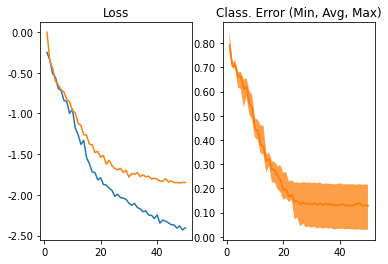

In [10]:
fig, axes = plt.subplots(1,2)
epoch = 50
t = np.arange(1, epoch + 1)

# colors
c = {'Head A': '#1f77b4', 'Head B': '#ff7f0e'}

# plot the loss
axes[0].clear()
axes[0].set_title('Loss')
axes[0].plot(t, mdl.perf['loss_A'][:epoch], label='Head A', color=c['Head A'])
axes[0].plot(t, mdl.perf['loss_B'][:epoch], label='Head B', color=c['Head B'])
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axes[1].set_title('Class. Error (Min, Avg, Max)')
axes[1].plot(t, mdl.perf['class_err_avg'][:epoch], color=c['Head B'])
axes[1].fill_between(t,
                              mdl.perf['class_err_min'][:epoch],
                              mdl.perf['class_err_max'][:epoch],
                              facecolor=c['Head B'], alpha=0.5)
axes[1].plot(t, mdl.perf['class_err_avg'][:epoch], color=c['Head B'])
axes[1].fill_between(t,
                              mdl.perf['class_err_min'][:epoch],
                              mdl.perf['class_err_max'][:epoch],
                              facecolor=c['Head B'], alpha=0.5)
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

### Third try : IIC on our dataset

#### Data

In [8]:
!pip install tensorflow_addons

In [9]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa


def mnist_x(x_orig, mdl_input_dims, is_training):

    # rescale to [0, 1]
    x_orig = tf.cast(x_orig, dtype=tf.float32) / x_orig.dtype.max

    # get common shapes
    height_width = mdl_input_dims[:-1]
    n_chans = mdl_input_dims[-1]

    # training transformations
    if is_training:
        x1 = tf.image.central_crop(x_orig, np.mean(20 / np.array(x_orig.shape.as_list()[1:-1])))
        x2 = tf.image.random_crop(x_orig, tf.concat((tf.shape(x_orig)[:1], [20, 20], [n_chans]), axis=0))
        x = tf.stack([x1, x2])
        x = tf.transpose(x, [1, 0, 2, 3, 4])
        i = tf.squeeze(tf.random.categorical([[1., 1.]], tf.shape(x)[0]))
        x = tf.map_fn(lambda y: y[0][y[1]], (x, i), dtype=tf.float32)
        x = tf.image.resize(x, height_width)

    # testing transformations
    else:
        x = tf.image.central_crop(x_orig, np.mean(20 / np.array(x_orig.shape.as_list()[1:-1])))
        x = tf.image.resize(x, height_width)

    return x


def mnist_gx(x_orig, mdl_input_dims, is_training, sample_repeats):

    # if not training, return a constant value--it will unused but needs to be same shape to avoid TensorFlow errors
    if not is_training:
        return tf.zeros([0] + mdl_input_dims)

    # rescale to [0, 1]
    x_orig = tf.cast(x_orig, dtype=tf.float32) / x_orig.dtype.max

    # repeat samples accordingly
    x_orig = tf.tile(x_orig, [sample_repeats] + [1] * len(x_orig.shape.as_list()[1:]))

    # get common shapes
    height_width = mdl_input_dims[:-1]
    n_chans = mdl_input_dims[-1]

    # random rotation
    rad = 2 * np.pi * 25 / 360
    x_rot = tfa.image.rotate(x_orig, tf.random.uniform(shape=tf.shape(x_orig)[:1], minval=-rad, maxval=rad))
    gx = tf.stack([x_orig, x_rot])
    gx = tf.transpose(gx, [1, 0, 2, 3, 4])
    i = tf.squeeze(tf.random.categorical([[1., 1.]], tf.shape(gx)[0]))
    gx = tf.map_fn(lambda y: y[0][y[1]], (gx, i), dtype=tf.float32)

    # random crops
    x1 = tf.image.random_crop(gx, tf.concat((tf.shape(x_orig)[:1], [16, 16], [n_chans]), axis=0))
    x2 = tf.image.random_crop(gx, tf.concat((tf.shape(x_orig)[:1], [20, 20], [n_chans]), axis=0))
    x3 = tf.image.random_crop(gx, tf.concat((tf.shape(x_orig)[:1], [24, 24], [n_chans]), axis=0))
    gx = tf.stack([tf.image.resize(x1, height_width),
                   tf.image.resize(x2, height_width),
                   tf.image.resize(x3, height_width)])
    gx = tf.transpose(gx, [1, 0, 2, 3, 4])
    i = tf.squeeze(tf.random.categorical([[1., 1., 1.]], tf.shape(gx)[0]))
    gx = tf.map_fn(lambda y: y[0][y[1]], (gx, i), dtype=tf.float32)

    # apply random adjustments
    def rand_adjust(img):
        img = tf.image.random_brightness(img, 0.4)
        img = tf.image.random_contrast(img, 0.6, 1.4)
        if img.shape.as_list()[-1] == 3:
            img = tf.image.random_saturation(img, 0.6, 1.4)
            img = tf.image.random_hue(img, 0.125)
        return img

    gx = tf.map_fn(lambda y: rand_adjust(y), gx, dtype=tf.float32)

    return gx


def pre_process_data(ds, info, is_training, **kwargs):
    """
    :param ds: TensorFlow Dataset object
    :param info: TensorFlow DatasetInfo object
    :param is_training: indicator to pre-processing function
    :return: the passed in data set with map pre-processing applied
    """
    # apply pre-processing function for given data set and run-time conditions
    if info == 'german_signs':
        return ds.map(lambda d: {'x': mnist_x(d['image'],
                                              mdl_input_dims=kwargs['mdl_input_dims'],
                                              is_training=is_training),
                                       'gx': mnist_gx(d['image'],
                                                mdl_input_dims=kwargs['mdl_input_dims'],
                                                is_training=is_training,
                                                sample_repeats=kwargs['num_repeats']),
                                       'label': d['label']},
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
    else:
        raise Exception('Unsupported data set: ' + info.name)


def configure_data_set(ds, info, batch_size, is_training, **kwargs):
    """
    :param ds: TensorFlow data set object
    :param info: TensorFlow DatasetInfo object
    :param batch_size: batch size
    :param is_training: indicator to pre-processing function
    :return: a configured TensorFlow data set object
    """
    # enable shuffling and repeats
    ds = ds.shuffle(10 * batch_size, reshuffle_each_iteration=True).repeat(1)

    # batch the data before pre-processing
    ds = ds.batch(batch_size)

    # pre-process the data set
    with tf.device('/cpu:0'):
        ds = pre_process_data(ds, info, is_training, **kwargs)

    # enable prefetch
    ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

    return ds


def load(X_train, y_train, X_test, y_test, **kwargs):
    """
    :param data_set_name: data set name--call tfds.list_builders() for options
    :return:
        train_dataset: TensorFlow Dataset object for the training data
        test_dataset: TensorFlow Dataset object for the testing data
        info: data set info object
    """
    # get data and its info
    train_dataset = tf.data.Dataset.from_tensor_slices({'image' : X_train, 'label' : y_train})
    test_dataset = tf.data.Dataset.from_tensor_slices({'image' : X_test, 'label' : y_test})

    # configure the data sets
 
    train_ds = configure_data_set(ds=train_dataset, info='german_signs', is_training=True, **kwargs)

    test_ds = configure_data_set(ds=test_dataset, info='german_signs', is_training=False, **kwargs)


    return train_ds, test_ds, 'german_signs'

#### Graph

In [10]:
import tensorflow as tf

# set trainable variable initialization routines
KERNEL_INIT = tf.keras.initializers.he_uniform()
WEIGHT_INIT = tf.random_normal_initializer(mean=0.0, stddev=0.01)
BIAS_INIT = tf.constant_initializer(0.0)


def convolution_layer(x, kernel_size, num_out_channels, activation, batch_norm, is_training, name):
    """
    :param x: input data
    :param kernel_size: convolution kernel size
    :param num_out_channels: number of output channels
    :param activation: non-linearity
    :param batch_norm: whether to use batch norm
    :param is_training: whether we are training or testing (used by batch normalization)
    :param name: variable scope name (empowers variable reuse)
    :return: layer output
    """
    # run convolution layer
    x = tf.compat.v1.layers.conv2d(inputs=x,
                         filters=num_out_channels,
                         kernel_size=[kernel_size] * 2,
                         strides=[1, 1],
                         padding='same',
                         activation=None,
                         use_bias=True,
                         kernel_initializer=KERNEL_INIT,
                         bias_initializer=BIAS_INIT,
                         name=name)
    # run batch norm if specified
    if batch_norm:
        x = tf.compat.v1.layers.BatchNormalization()(x)

    # run activation
    x = activation(x)

    return x


def max_pooling_layer(x, pool_size, strides, name):
    """
    :param x: input data
    :param pool_size: pooling kernel size
    :param strides: pooling stride length
    :param name: variable scope name (empowers variable reuse)
    :return: layer output
    """
    # run max pooling
    x = tf.compat.v1.layers.max_pooling2d(inputs=x, pool_size=pool_size, strides=strides, padding='same', name=name)

    return x


def fully_connected_layer(x, num_outputs, activation, is_training, name):
    """
    :param x: input data
    :param num_outputs: number of outputs
    :param activation: non-linearity
    :param is_training: whether we are training or testing (used by batch normalization)
    :param name: variable scope name (empowers variable reuse)
    :return: layer output
    """
    # run dense layer
    x = tf.compat.v1.layers.dense(inputs=x,
                        units=num_outputs,
                        activation=None,
                        use_bias=True,
                        kernel_initializer=WEIGHT_INIT,
                        bias_initializer=BIAS_INIT,
                        name=name)

    # run batch norm
    x = tf.contrib.layers.batch_norm(inputs=x, activation_fn=activation, is_training=is_training)

    return x


class IICGraph(object):
    def __init__(self, config='B', batch_norm=True, fan_out_init=64):
        """
        :param config: character {A, B, C} that matches architecture in IIC supplementary materials
        :param fan_out_init: initial fan out (paper uses 64, but can be reduced for memory constrained systems)
        """
        # set activation
        self.activation = tf.nn.relu

        # save architectural details
        self.config = config
        self.batch_norm = batch_norm
        self.fan_out_init = fan_out_init

    def __architecture_b(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('GraphB', reuse=tf.compat.v1.AUTO_REUSE):

            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1')
            x = max_pooling_layer(x=x, pool_size=2, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2')
            x = max_pooling_layer(x=x, pool_size=2, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3')
            x = max_pooling_layer(x=x, pool_size=2, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=5, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4')

            # flatten
            x = tf.keras.layers.Flatten()(x)

            return x

    def evaluate(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of graph
        """
        # run corresponding architecture
        if self.config == 'B':
            return self.__architecture_b(x, is_training)
        else:
            raise Exception('Unknown graph configuration!')


class VGG(object):
    def __init__(self, config='A', batch_norm=True, fan_out_init=64):
        """
        :param config: character {A, C, D} that matches architecture in VGG paper
        :param fan_out_init: initial fan out (paper uses 64, but can be reduced for memory constrained systems)
        """
        # set activation
        self.activation = tf.nn.relu

        # save architectural details
        self.config = config
        self.batch_norm = batch_norm
        self.fan_out_init = fan_out_init

    def __vgg_a(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('VGG_A', reuse=tf.compat.v1.AUTO_REUSE):

            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_1')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_1')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool4')

            # layer 5
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool5')

            # flatten
            x = tf.contrib.layers.flatten(x)

            # fully connected layers
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc1')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc2')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc3')

            return x

    def __vgg_c(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('VGG_C', reuse=tf.compat.v1.AUTO_REUSE):
            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_2')
            x = convolution_layer(x=x, kernel_size=1, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_2')
            x = convolution_layer(x=x, kernel_size=1, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool4')

            # layer 5
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_2')
            x = convolution_layer(x=x, kernel_size=1, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool5')

            # flatten
            x = tf.contrib.layers.flatten(x)

            # fully connected layers
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc1')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc2')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc3')

            return x

    def __vgg_d(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        with tf.compat.v1.variable_scope('VGG_D', reuse=tf.compat.v1.AUTO_REUSE):
            # layer 1
            num_out_channels = self.fan_out_init
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv1_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool1')

            # layer 2
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv2_2')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool2')

            # layer 3
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_2')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv3_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool3')

            # layer 4
            num_out_channels *= 2
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_2')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv4_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool4')

            # layer 5
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_1')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_2')
            x = convolution_layer(x=x, kernel_size=3, num_out_channels=num_out_channels, activation=self.activation,
                                  batch_norm=self.batch_norm, is_training=is_training, name='conv5_3')
            x = max_pooling_layer(x=x, pool_size=3, strides=2, name='pool5')

            # flatten
            x = tf.contrib.layers.flatten(x)

            # fully connected layers
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc1')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc2')
            x = fully_connected_layer(x=x,
                                      num_outputs=4096,
                                      activation=self.activation,
                                      is_training=is_training,
                                      name='fc3')

            return x

    def evaluate(self, x, is_training):
        """
        :param x: input data
        :param is_training: whether we are training or testing (used by batch normalization)
        :return: output of VGG
        """
        # run corresponding architecture
        if self.config == 'A':
            return self.__vgg_a(x, is_training)
        elif self.config == 'C':
            return self.__vgg_c(x, is_training)
        elif self.config == 'D':
            return self.__vgg_d(x, is_training)
        else:
            raise Exception('Unknown VGG configuration!')

#### Utils

In [11]:
import os
import pickle
import numpy as np
from scipy.optimize import linear_sum_assignment


def save_performance(perf, epoch, save_path):
    """
    :param perf: performance dictionary
    :param epoch: epoch number
    :param save_path: path to save plot to. if None, plot will be drawn
    :return: none
    """
    # return if save path is None
    if save_path is None:
        return

    # loop over the metrics
    for metric in perf.keys():

        # loop over the data splits
        for split in perf[metric].keys():

            # trim data to utilized epochs
            perf[metric][split] = perf[metric][split][:epoch]
            assert len(perf[metric][split]) == epoch

    # create the file name
    f_name = os.path.join(save_path, 'perf.pkl')

    # pickle it
    with open(f_name, 'wb') as f:
        pickle.dump(perf, f, pickle.HIGHEST_PROTOCOL)

    # make sure it worked
    with open(f_name, 'rb') as f:
        perf_load = pickle.load(f)
    assert str(perf) == str(perf_load), 'performance saving failed'


def unsupervised_labels(y, y_hat, num_classes, num_clusters):
    """
    :param y: true label
    :param y_hat: concentration parameter
    :param num_classes: number of classes (determined by data)
    :param num_clusters: number of clusters (determined by model)
    :return: classification error rate
    """
    assert num_classes == num_clusters

    # initialize count matrix
    cnt_mtx = np.zeros([num_classes, num_classes])

    # fill in matrix
    for i in range(len(y)):
        cnt_mtx[int(y_hat[i]), int(y[i])] += 1

    # find optimal permutation
    row_ind, col_ind = linear_sum_assignment(-cnt_mtx)

    # compute error
    error = 1 - cnt_mtx[row_ind, col_ind].sum() / cnt_mtx.sum()

    # print results
    print('Classification error = {:.4f}'.format(error))

    return error

#### IIC Model

In [12]:
!pip install tf_slim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 kB 597.5 kB/s eta 0:00:00a 0:00:01


In [13]:
import copy
import time
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as patches
from matplotlib.ticker import FormatStrFormatter
import tf_slim as slim

# plot settings
DPI = 600


class ClusterIIC(object):
    def __init__(self, num_classes, learning_rate, num_repeats, save_dir=None):
        """
        :param num_classes: number of classes
        :param learning_rate: gradient step size
        :param num_repeats: number of data repeats for x and g(x), used to up-sample
        """
        # save configuration
        self.k_A = 5 * num_classes
        self.num_A_sub_heads = 1
        self.k_B = num_classes
        self.num_B_sub_heads = 5
        self.num_repeats = num_repeats

        # initialize losses
        self.loss_A = None
        self.loss_B = None
        self.losses = []

        # initialize outputs
        self.y_hats = None

        # initialize optimizer
        self.is_training = tf.compat.v1.placeholder(tf.bool)
        self.learning_rate = learning_rate
        self.global_step = tf.Variable(0, name='global_step', trainable=False)
        self.opt = tf.compat.v1.train.AdamOptimizer(self.learning_rate)
        self.train_ops = []

        # initialize performance dictionary
        self.perf = None
        self.save_dir = save_dir

        # configure performance plotting
        self.fig_learn, self.ax_learn = plt.subplots(1, 2)

    def __iic_loss(self, pi_x, pi_gx):

        # up-sample non-perturbed to match the number of repeat samples
        pi_x = tf.tile(pi_x, [self.num_repeats] + [1] * len(pi_x.shape.as_list()[1:]))

        # get K
        k = pi_x.shape.as_list()[1]

        # compute P
        p = tf.transpose(pi_x) @ pi_gx

        # enforce symmetry
        p = (p + tf.transpose(p)) / 2

        # enforce minimum value
        p = tf.clip_by_value(p, clip_value_min=1e-6, clip_value_max=tf.float32.max)

        # normalize
        p /= tf.reduce_sum(p)

        # get marginals
        pi = tf.broadcast_to(tf.reshape(tf.reduce_sum(p, axis=0), (k, 1)), (k, k))
        pj = tf.broadcast_to(tf.reshape(tf.reduce_sum(p, axis=1), (1, k)), (k, k))

        # complete the loss
        loss = -tf.reduce_sum(p * (tf.math.log(p) - tf.math.log(pi) - tf.math.log(pj)))

        return loss

    @staticmethod
    def __head_out(z, k, name):

        # construct a new head that operates on the model's output for x
        with tf.compat.v1.variable_scope(name, reuse=tf.compat.v1.AUTO_REUSE):
            phi = tf.compat.v1.layers.dense(
                inputs=z,
                units=k,
                activation=tf.nn.softmax,
                use_bias=True,
                kernel_initializer=KERNEL_INIT,
                bias_initializer=BIAS_INIT)

        return phi

    def __head_loss(self, z_x, z_gx, k, num_sub_heads, head):

        # loop over the number of sub-heads
        loss = tf.constant(0, dtype=tf.float32)
        for i in range(num_sub_heads):

            # run the model
            pi_x = self.__head_out(z_x, k, name=head + str(i + 1))
            num_vars = len(tf.compat.v1.global_variables())
            pi_gx = self.__head_out(z_gx, k, name=head + str(i + 1))
            assert num_vars == len(tf.compat.v1.global_variables())

            # accumulate the clustering loss
            loss += self.__iic_loss(pi_x, pi_gx)

        # take the average
        if num_sub_heads > 0:
            loss /= num_sub_heads

        return loss

    def __build(self, x, gx, graph):

        # run the graph
        z_x = graph.evaluate(x, is_training=self.is_training)
        num_vars = len(tf.compat.v1.global_variables())
        z_gx = graph.evaluate(gx, is_training=self.is_training)
        assert num_vars == len(tf.compat.v1.global_variables())

        # construct losses
        self.loss_A = self.__head_loss(z_x, z_gx, self.k_A, self.num_A_sub_heads, 'A')
        self.loss_B = self.__head_loss(z_x, z_gx, self.k_B, self.num_B_sub_heads, 'B')
        self.losses = [self.loss_A, self.loss_B]

        # set alternating training operations
        self.train_ops.append(slim.optimize_loss(loss=self.loss_A,
                                                              global_step=self.global_step,
                                                              learning_rate=self.learning_rate,
                                                              optimizer=self.opt,
                                                              summaries=['loss', 'gradients']))
        self.train_ops.append(slim.optimize_loss(loss=self.loss_B,
                                                              global_step=self.global_step,
                                                              learning_rate=self.learning_rate,
                                                              optimizer=self.opt,
                                                              summaries=['loss', 'gradients']))

        # initialize outputs outputs
        self.y_hats = [tf.argmax(self.__head_out(z_x, self.k_B, 'B' + str(i + 1)), axis=1)
                       for i in range(self.num_B_sub_heads)]

    def __performance_dictionary_init(self, num_epochs):
        """
        :param num_epochs: maximum number of epochs (used to size buffers)
        :return: None
        """
        # initialize performance dictionary
        self.perf = dict()

        # loss terms
        self.perf.update({'loss_A': np.zeros(num_epochs)})
        self.perf.update({'loss_B': np.zeros(num_epochs)})

        # classification error
        self.perf.update({'class_err_min': np.zeros(num_epochs)})
        self.perf.update({'class_err_avg': np.zeros(num_epochs)})
        self.perf.update({'class_err_max': np.zeros(num_epochs)})

    def __classification_accuracy(self, sess, iter_init, idx, y_ph=None):
        """
        :param sess: TensorFlow session
        :param iter_init: TensorFlow data iterator initializer associated
        :param idx: insertion index (i.e. epoch - 1)
        :param y_ph: TensorFlow placeholder for unseen labels
        :return: None
        """
        if self.perf is None or y_ph is None:
            return

        # initialize results
        y = np.zeros([0, 1])
        y_hats = [np.zeros([0, 1])] * self.num_B_sub_heads

        # initialize unsupervised data iterator
        sess.run(iter_init)

        # loop over the batches within the unsupervised data iterator
        print('Evaluating classification accuracy... ')
        while True:
            try:
                # grab the results
                results = sess.run([self.y_hats, y_ph], feed_dict={self.is_training: False})

                # load metrics
                for i in range(self.num_B_sub_heads):
                    y_hats[i] = np.concatenate((y_hats[i], np.expand_dims(results[0][i], axis=1)))
                if y_ph is not None:
                    y = np.concatenate((y, np.expand_dims(results[1], axis=1)))

                # _, ax = plt.subplots(2, 10)
                # i_rand = np.random.choice(results[3].shape[0], 10)
                # for i in range(10):
                #     ax[0, i].imshow(results[3][i_rand[i]][:, :, 0], origin='upper', vmin=0, vmax=1)
                #     ax[0, i].set_xticks([])
                #     ax[0, i].set_yticks([])
                #     ax[1, i].imshow(results[4][i_rand[i]][:, :, 0], origin='upper', vmin=0, vmax=1)
                #     ax[1, i].set_xticks([])
                #     ax[1, i].set_yticks([])
                # plt.show()

            # iterator will throw this error when its out of data
            except tf.errors.OutOfRangeError:
                break

        # compute classification accuracy
        if y_ph is not None:
            class_errors = [unsupervised_labels(y, y_hats[i], self.k_B, self.k_B)
                            for i in range(self.num_B_sub_heads)]
            self.perf['class_err_min'][idx] = np.min(class_errors)
            self.perf['class_err_avg'][idx] = np.mean(class_errors)
            self.perf['class_err_max'][idx] = np.max(class_errors)

        # metrics are done
        print('Done')

    def plot_learning_curve(self, epoch):
        """
        :param epoch: epoch number
        :return: None
        """
        # generate epoch numbers
        t = np.arange(1, epoch + 1)

        # colors
        c = {'Head A': '#1f77b4', 'Head B': '#ff7f0e'}

        # plot the loss
        self.ax_learn[0].clear()
        self.ax_learn[0].set_title('Loss')
        self.ax_learn[0].plot(t, self.perf['loss_A'][:epoch], label='Head A', color=c['Head A'])
        self.ax_learn[0].plot(t, self.perf['loss_B'][:epoch], label='Head B', color=c['Head B'])
        self.ax_learn[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        self.ax_learn[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # plot the classification error
        self.ax_learn[1].clear()
        self.ax_learn[1].set_title('Class. Error (Min, Avg, Max)')
        self.ax_learn[1].plot(t, self.perf['class_err_avg'][:epoch], color=c['Head B'])
        self.ax_learn[1].fill_between(t,
                                      self.perf['class_err_min'][:epoch],
                                      self.perf['class_err_max'][:epoch],
                                      facecolor=c['Head B'], alpha=0.5)
        self.ax_learn[1].plot(t, self.perf['class_err_avg'][:epoch], color=c['Head B'])
        self.ax_learn[1].fill_between(t,
                                      self.perf['class_err_min'][:epoch],
                                      self.perf['class_err_max'][:epoch],
                                      facecolor=c['Head B'], alpha=0.5)
        self.ax_learn[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        self.ax_learn[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # make the legend
        self.ax_learn[1].legend(handles=[patches.Patch(color=val, label=key) for key, val in c.items()],
                                ncol=len(c),
                                bbox_to_anchor=(0.35, -0.06))

        # eliminate those pesky margins
        self.fig_learn.subplots_adjust(left=0.1, bottom=0.15, right=0.95, top=0.95, wspace=0.25, hspace=0.3)

    def train(self, graph, train_set, test_set, num_epochs, early_stop_buffer=15):
        """
        :param graph: the computational graph
        :param train_set: TensorFlow Dataset object that corresponds to training data
        :param test_set: TensorFlow Dataset object that corresponds to validation data
        :param num_epochs: number of epochs
        :param early_stop_buffer: early stop look-ahead distance (in epochs)
        :return: None
        """
        # construct iterator
        iterator = tf.compat.v1.data.make_initializable_iterator(train_set)
        x, gx, y = iterator.get_next().values()

        # construct initialization operations
        train_iter_init = iterator.make_initializer(train_set)
        test_iter_init = iterator.make_initializer(test_set)

        # build the model using the supplied computational graph
        self.__build(x, gx, graph)

        # initialize performance dictionary
        self.__performance_dictionary_init(num_epochs)

        # start a monitored session
        cfg = tf.compat.v1.ConfigProto()
        cfg.gpu_options.allow_growth = True
        with tf.compat.v1.Session(config=cfg) as sess:

            # initialize model variables
            sess.run(tf.compat.v1.global_variables_initializer())

            # loop over the number of epochs
            for i in range(num_epochs):

                # start timer
                start = time.time()

                # get epoch number
                epoch = i + 1

                # get training operation
                i_train = i % len(self.train_ops)

                # initialize epoch iterator
                sess.run(train_iter_init)

                # loop over the batches
                loss_A = []
                loss_B = []
                while True:
                    try:

                        # run training and losses
                        losses = sess.run([self.train_ops[i_train]] + [self.losses],
                                          feed_dict={self.is_training: True})[-1]

                        # load metrics
                        loss_A.append(losses[0])
                        loss_B.append(losses[1])

                        if np.isnan(losses).any():
                            print('\n NaN whelp!')
                            return

                        # print update
                        print('\rEpoch {:d}, Loss = {:.4f}'.format(epoch, losses[i_train]), end='')

                    # iterator will throw this error when its out of data
                    except tf.errors.OutOfRangeError:
                        break

                # new line
                print('')

                # save averaged training performance
                self.perf['loss_A'][i] = np.mean(loss_A)
                self.perf['loss_B'][i] = np.mean(loss_B)

                # get classification performance
                self.__classification_accuracy(sess, test_iter_init, i, y)

                # plot learning curve
                self.plot_learning_curve(epoch)

                # pause for plot drawing if we aren't saving
                if self.save_dir is None:
                    plt.pause(0.05)

                # print time for epoch
                stop = time.time()
                print('Time for Epoch = {:f}'.format(stop - start))

                # early stop check
                # i_best_elbo = np.argmin(self.perf['loss']['test'][:epoch])
                # i_best_class = np.argmin(self.perf['class_err']['test'][:epoch])
                # epochs_since_improvement = min(i - i_best_elbo, i - i_best_class)
                # print('Early stop checks: {:d} / {:d}\n'.format(epochs_since_improvement, early_stop_buffer))
                # if epochs_since_improvement >= early_stop_buffer:
                #     break

        # save the performance
        save_performance(self.perf, epoch, self.save_dir)

#### Run

2022-12-09 16:09:47.355680: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-09 16:09:51.186829: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-09 16:09:52.397223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1, Loss = -0.0003
Evaluating classification accuracy... 
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Done


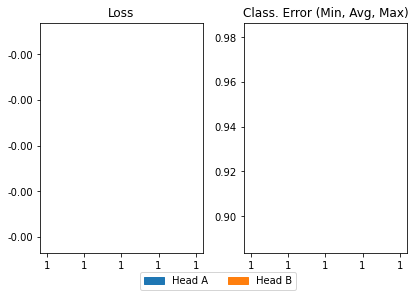

Time for Epoch = 388.397235
Epoch 2, Loss = -0.0004
Evaluating classification accuracy... 
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Done
Time for Epoch = 387.853499
Epoch 3, Loss = -0.0045
Evaluating classification accuracy... 
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Classification error = 0.9350
Done
Time for Epoch = 345.114410
Epoch 4, Loss = -0.0020

KeyboardInterrupt: 

In [14]:
tf.compat.v1.disable_eager_execution()

# pick a data set
DATA_SET = 'german_sign'

# define splits
DS_CONFIG = {
    # german signs data set parameters
    'german_sign': {
        'batch_size': 1000,
        'num_repeats': 5,
        'mdl_input_dims': [32, 32, 3]}
}

# load the data set
TRAIN_SET, TEST_SET, SET_INFO = load(X_train, y_train, X_test, y_test, **DS_CONFIG[DATA_SET])

# configure the common model elements
MDL_CONFIG = {
    # hyper-parameters
    'german_sign': {
        'num_classes': 43,
        'learning_rate': 1e-5,
        'num_repeats': DS_CONFIG[DATA_SET]['num_repeats'],
        'save_dir': None},
}

# declare the model
mdl2 = ClusterIIC(**MDL_CONFIG[DATA_SET])

# train the model
mdl2.train(IICGraph(config='B', batch_norm=True, fan_out_init=64), TRAIN_SET, TEST_SET, num_epochs=5)

print('All done!')
plt.show()

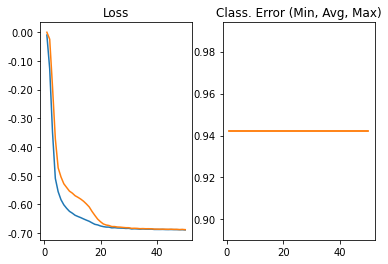

In [24]:
fig, axes = plt.subplots(1,2)
epoch = 50
t = np.arange(1, epoch + 1)

# colors
c = {'Head A': '#1f77b4', 'Head B': '#ff7f0e'}

# plot the loss
axes[0].clear()
axes[0].set_title('Loss')
axes[0].plot(t, mdl2.perf['loss_A'][:epoch], label='Head A', color=c['Head A'])
axes[0].plot(t, mdl2.perf['loss_B'][:epoch], label='Head B', color=c['Head B'])
axes[0].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axes[1].set_title('Class. Error (Min, Avg, Max)')
axes[1].plot(t, mdl2.perf['class_err_avg'][:epoch], color=c['Head B'])
axes[1].fill_between(t,
                              mdl2.perf['class_err_min'][:epoch],
                              mdl2.perf['class_err_max'][:epoch],
                              facecolor=c['Head B'], alpha=0.5)
axes[1].plot(t, mdl2.perf['class_err_avg'][:epoch], color=c['Head B'])
axes[1].fill_between(t,
                              mdl2.perf['class_err_min'][:epoch],
                              mdl2.perf['class_err_max'][:epoch],
                              facecolor=c['Head B'], alpha=0.5)
axes[1].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))